In [338]:
import sys
import os
import seaborn as sns
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split,GridSearchCV,KFold,cross_val_score
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


warnings.filterwarnings('ignore')
%matplotlib inline

In [339]:
house_train_data=pd.read_csv (r"D:\UPGRAD\Machine Learning 2\submission assignment\my work\train.csv")

In [340]:
## understnading data 
house_train_data.shape

(1460, 81)

In [341]:
house_train_data.info

<bound method DataFrame.info of         Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Ut

In [342]:
house_train_data.head

<bound method NDFrame.head of         Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Util

In [343]:
house_train_data.describe([0.25,0.50,0.75,0.95,0.99])

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
95%,1387.050000,160.000000,107.000000,17401.150000,8.000000,8.000000,2007.000000,2007.000000,456.000000,1274.000000,...,335.000000,175.050000,180.150000,0.000000,160.000000,0.000000,0.000000,11.000000,2010.000000,326100.000000
99%,1445.410000,190.000000,141.000000,37567.640000,10.000000,9.000000,2009.000000,2009.000000,791.920000,1572.410000,...,505.460000,285.820000,261.050000,168.000000,268.050000,0.000000,700.000000,12.000000,2010.000000,442567.010000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [344]:
## Checking null values 
round(house_train_data.isnull().sum()/len(house_train_data.index),3).sort_values(ascending=False).head(30)

PoolQC          0.995
MiscFeature     0.963
Alley           0.938
Fence           0.808
FireplaceQu     0.473
LotFrontage     0.177
GarageCond      0.055
GarageType      0.055
GarageYrBlt     0.055
GarageFinish    0.055
GarageQual      0.055
BsmtExposure    0.026
BsmtFinType2    0.026
BsmtFinType1    0.025
BsmtCond        0.025
BsmtQual        0.025
MasVnrArea      0.005
MasVnrType      0.005
Electrical      0.001
Utilities       0.000
YearRemodAdd    0.000
MSSubClass      0.000
Foundation      0.000
ExterCond       0.000
ExterQual       0.000
Exterior2nd     0.000
Exterior1st     0.000
RoofMatl        0.000
RoofStyle       0.000
YearBuilt       0.000
dtype: float64

In [345]:
## considering 15% as my threshold and drop colun more then threshold 
round(house_train_data.isnull().sum()/len(house_train_data.index),2)[round(house_train_data.isnull().sum()/
                                                                 len(house_train_data.index),2).values>0.15]

LotFrontage    0.18
Alley          0.94
FireplaceQu    0.47
PoolQC         1.00
Fence          0.81
MiscFeature    0.96
dtype: float64

In [346]:
house_train_data = house_train_data.drop(['LotFrontage','Alley','FireplaceQu','PoolQC','Fence','MiscFeature','MoSold'],axis='columns')

In [347]:
## column checking where missing value vetween 0-15 % threshold 
round(house_train_data.isnull().sum()/len(house_train_data.index),2)[round(house_train_data.isnull().sum()/
                                                                 len(house_train_data.index),2).values>0.00]

MasVnrType      0.01
MasVnrArea      0.01
BsmtQual        0.03
BsmtCond        0.03
BsmtExposure    0.03
BsmtFinType1    0.03
BsmtFinType2    0.03
GarageType      0.06
GarageYrBlt     0.06
GarageFinish    0.06
GarageQual      0.06
GarageCond      0.06
dtype: float64

In [348]:
## getting year built age
house_train_data['YearBuilt_Age'] = house_train_data.YearBuilt.max()-house_train_data.YearBuilt
house_train_data['YearRemodAdd_Age'] = house_train_data.YearRemodAdd.max()-house_train_data.YearRemodAdd
house_train_data['GarageYrBlt_Age'] = house_train_data.GarageYrBlt.max()-house_train_data.GarageYrBlt
house_train_data['YrSold_Age'] = house_train_data.YrSold.max()-house_train_data.YrSold
house_train_data[['YearBuilt','YearRemodAdd','GarageYrBlt','YrSold','YearBuilt_Age','YearRemodAdd_Age',
             'GarageYrBlt_Age','YrSold_Age']].sample(10)

,YearBuilt,YearRemodAdd,GarageYrBlt,YrSold,YearBuilt_Age,YearRemodAdd_Age,GarageYrBlt_Age,YrSold_Age
185,1892,1993,1993.0,2006,118,17,17.0,4
919,1958,2002,1990.0,2008,52,8,20.0,2
320,2006,2006,2006.0,2006,4,4,4.0,4
509,1959,1959,1959.0,2009,51,51,51.0,1
308,1940,1950,1961.0,2009,70,60,49.0,1
968,1910,1950,NaN,2009,100,60,NaN,1
387,1976,1976,1977.0,2009,34,34,33.0,1
1387,1916,1950,1916.0,2007,94,60,94.0,3
494,1938,1996,1938.0,2009,72,14,72.0,1
1056,2005,2005,2005.0,2006,5,5,5.0,4


In [349]:
# drop year columns
house_train_data = house_train_data.drop(['YearBuilt','YearRemodAdd','GarageYrBlt','YrSold'],axis='columns')

In [350]:
# imputing missing values 
house_train_data.MasVnrType.fillna('None',inplace=True)
house_train_data.MasVnrArea.fillna(house_train_data.MasVnrArea.mean(),inplace=True)
house_train_data.BsmtQual.fillna('TA',inplace=True)
house_train_data.BsmtCond.fillna('TA',inplace=True)
house_train_data.BsmtExposure.fillna('No',inplace=True)
house_train_data.BsmtFinType1.fillna('Unf',inplace=True)
house_train_data.BsmtFinType2.fillna('Unf',inplace=True)
house_train_data.GarageType.fillna('Attchd',inplace=True)
house_train_data.GarageYrBlt_Age.fillna(-1,inplace=True)
house_train_data.GarageFinish.fillna('Unf',inplace=True)
house_train_data.GarageQual.fillna('TA',inplace=True)
house_train_data.GarageCond.fillna('TA',inplace=True)

In [351]:
# drop street and utilities as having low variance , id column too as its of no use 
house_train_data.Street.value_counts()
house_train_data.Utilities.value_counts()
house_train_data = house_train_data.drop(['Street','Utilities','Id'],axis='columns')

In [352]:
house_train_data[list(house_train_data.dtypes[house_train_data.dtypes!='object'].index)].describe()

,MSSubClass,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice,YearBuilt_Age,YearRemodAdd_Age,GarageYrBlt_Age,YrSold_Age
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,10516.828082,6.099315,5.575342,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,...,21.954110,3.409589,15.060959,2.758904,43.489041,180921.195890,38.732192,25.134247,29.691096,2.184247
std,42.300571,9981.264932,1.382997,1.112799,180.569112,456.098091,161.319273,441.866955,438.705324,386.587738,...,61.119149,29.317331,55.757415,40.177307,496.123024,79442.502883,30.202904,20.645407,25.121824,1.328095
min,20.000000,1300.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,34900.000000,0.000000,0.000000,-1.000000,0.000000
25%,20.000000,7553.500000,5.000000,5.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,129975.000000,10.000000,6.000000,7.000000,1.000000
50%,50.000000,9478.500000,6.000000,5.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,163000.000000,37.000000,16.000000,25.500000,2.000000
75%,70.000000,11601.500000,7.000000,6.000000,164.250000,712.250000,0.000000,808.000000,1298.250000,1391.250000,...,0.000000,0.000000,0.000000,0.000000,0.000000,214000.000000,56.000000,43.000000,48.000000,3.000000
max,190.000000,215245.000000,10.000000,9.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,...,552.000000,508.000000,480.000000,738.000000,15500.000000,755000.000000,138.000000,60.000000,110.000000,4.000000


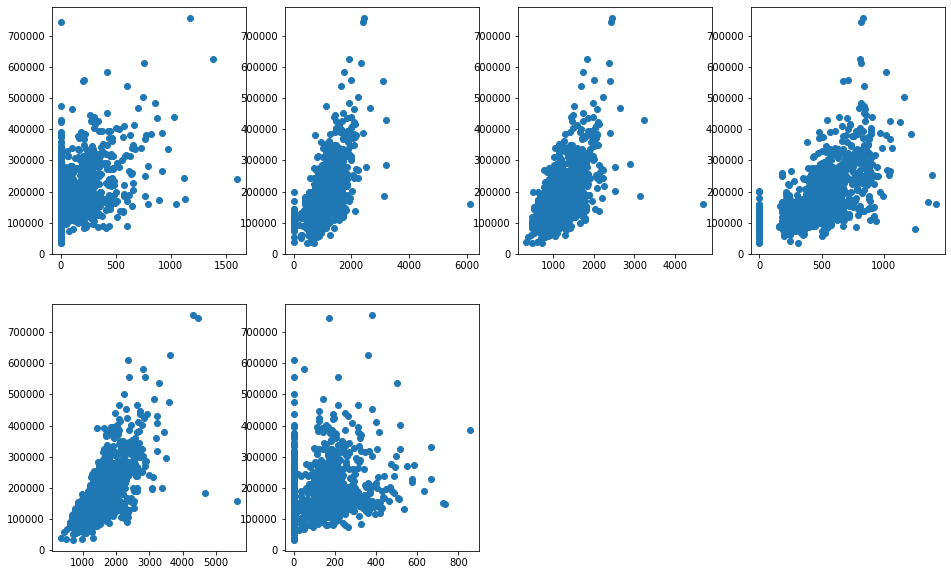

In [353]:
# plotting grapg for EDA 
plt.figure(figsize=(16,10))
plt.subplot(2,4,1)
plt.scatter(house_train_data.MasVnrArea,house_train_data.SalePrice)
plt.subplot(2,4,2)
plt.scatter(house_train_data.TotalBsmtSF,house_train_data.SalePrice)
plt.subplot(2,4,3)
plt.scatter(house_train_data['1stFlrSF'],house_train_data.SalePrice)
plt.subplot(2,4,4)
plt.scatter(house_train_data['GarageArea'],house_train_data.SalePrice)
plt.subplot(2,4,5)
plt.scatter(house_train_data['GrLivArea'],house_train_data.SalePrice)
plt.subplot(2,4,6)
plt.scatter(house_train_data['WoodDeckSF'],house_train_data.SalePrice)

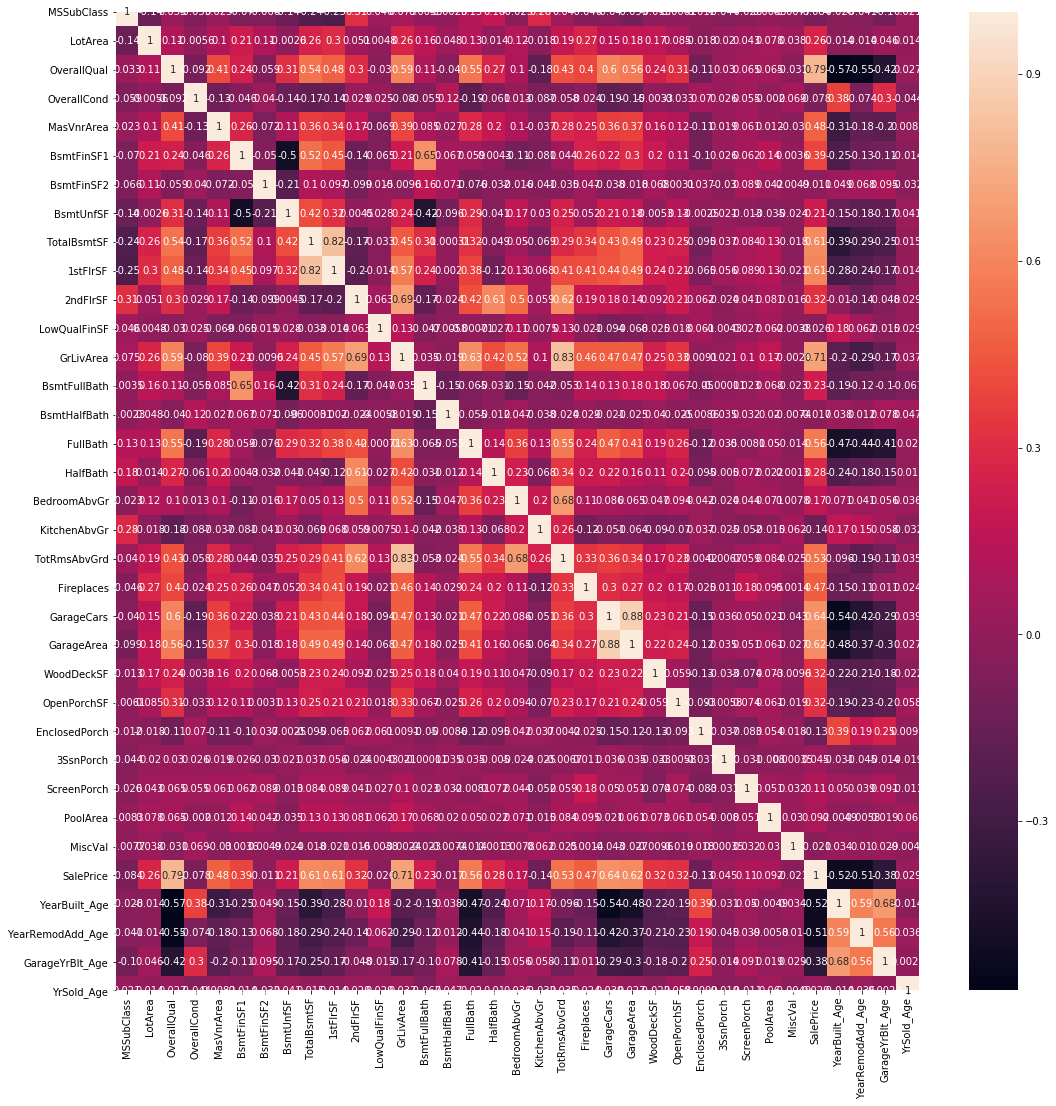

In [354]:
# checking coorelation using heatmap 
plt.figure(figsize=(18,18))
sns.heatmap(house_train_data[list(house_train_data.dtypes[house_train_data.dtypes!='object'].index)].corr(),annot=True)
plt.show()

In [355]:
# handling outliers 
num_col = list(house_train_data.dtypes[house_train_data.dtypes !='object'].index)
num_col = ['LotArea','MasVnrArea','BsmtFinSF1','BsmtFinSF2','TotalBsmtSF','1stFlrSF','GrLivArea','OpenPorchSF',
           'EnclosedPorch','3SsnPorch',
           'ScreenPorch' ,'PoolArea','MiscVal','SalePrice']
def drop_outliers(x):
    list = []
    for col in num_col:
        Q1 = x[col].quantile(.20)
        Q3 = x[col].quantile(.99)
        IQR = Q3-Q1
        x =  x[(x[col] >= (Q1-(1.5*IQR))) & (x[col] <= (Q3+(1.5*IQR)))] 
    return x   

house_train_data = drop_outliers(house_train_data)

In [356]:
house_train_data.shape

(1441, 71)

In [357]:
house_train_data[list(house_train_data.dtypes[house_train_data.dtypes=='object'].index)].head(20)

,MSZoning,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,...,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,RL,Reg,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
1,RL,Reg,Lvl,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,...,SBrkr,TA,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
2,RL,IR1,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
3,RL,IR1,Lvl,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,...,SBrkr,Gd,Typ,Detchd,Unf,TA,TA,Y,WD,Abnorml
4,RL,IR1,Lvl,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
5,RL,IR1,Lvl,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,...,SBrkr,TA,Typ,Attchd,Unf,TA,TA,Y,WD,Normal
6,RL,Reg,Lvl,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
7,RL,IR1,Lvl,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,...,SBrkr,TA,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
8,RM,Reg,Lvl,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,...,FuseF,TA,Min1,Detchd,Unf,Fa,TA,Y,WD,Abnorml
9,RL,Reg,Lvl,Corner,Gtl,BrkSide,Artery,Artery,2fmCon,1.5Unf,...,SBrkr,TA,Typ,Attchd,RFn,Gd,TA,Y,WD,Normal


In [358]:
# ordinal column 
house_train_data[['LandSlope','ExterQual','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2',
            'HeatingQC','CentralAir',  'KitchenQual','GarageFinish','GarageQual','GarageCond',
             'ExterCond','LotShape']].head()

,LandSlope,ExterQual,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,HeatingQC,CentralAir,KitchenQual,GarageFinish,GarageQual,GarageCond,ExterCond,LotShape
0,Gtl,Gd,Gd,TA,No,GLQ,Unf,Ex,Y,Gd,RFn,TA,TA,TA,Reg
1,Gtl,TA,Gd,TA,Gd,ALQ,Unf,Ex,Y,TA,RFn,TA,TA,TA,Reg
2,Gtl,Gd,Gd,TA,Mn,GLQ,Unf,Ex,Y,Gd,RFn,TA,TA,TA,IR1
3,Gtl,TA,TA,Gd,No,ALQ,Unf,Gd,Y,Gd,Unf,TA,TA,TA,IR1
4,Gtl,Gd,Gd,TA,Av,GLQ,Unf,Ex,Y,Gd,RFn,TA,TA,TA,IR1


In [359]:
house_train_data['LandSlope'] = house_train_data.LandSlope.map({'Gtl':0,'Mod':1,'Sev':2})
house_train_data['ExterQual'] = house_train_data.ExterQual.map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
house_train_data['BsmtQual'] = house_train_data.BsmtQual.map({'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
house_train_data['BsmtCond'] = house_train_data.BsmtCond.map({'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
house_train_data['BsmtExposure'] = house_train_data.BsmtExposure.map({'NA':0,'No':1,'Mn':2,'Av':3,'Gd':4})
house_train_data['BsmtFinType1'] = house_train_data.BsmtFinType1.map({'NA':0,'Unf':1,'LwQ':2,'Rec':3,'BLQ':4,'ALQ':5,'GLQ':6})
house_train_data['BsmtFinType2'] = house_train_data.BsmtFinType2.map({'NA':0,'Unf':1,'LwQ':2,'Rec':3,'BLQ':4,'ALQ':5,'GLQ':6})
house_train_data['HeatingQC'] = house_train_data.HeatingQC.map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
house_train_data['CentralAir'] = house_train_data.CentralAir.map({'N':0,'Y':1})
house_train_data['KitchenQual'] = house_train_data.KitchenQual.map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
house_train_data['GarageFinish'] = house_train_data.GarageFinish.map({'NA':0,'Unf':1,'RFn':2,'Fin':3})
house_train_data['GarageQual'] = house_train_data.GarageQual.map({'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
house_train_data['GarageCond'] = house_train_data.GarageCond.map({'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
house_train_data['ExterCond'] = house_train_data.ExterCond.map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
house_train_data['LotShape'] = house_train_data.LotShape.map({'IR1':0,'IR2':1,'IR3':2,'Reg':3})

In [360]:
# looking chnaged column
house_train_data[['LandSlope','ExterQual','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2',
            'HeatingQC','CentralAir',  'KitchenQual','GarageFinish','GarageQual','GarageCond',
             'ExterCond']].head()

,LandSlope,ExterQual,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,HeatingQC,CentralAir,KitchenQual,GarageFinish,GarageQual,GarageCond,ExterCond
0,0,3,4,3,1,6,1,4,1,3,2,3,3,2
1,0,2,4,3,4,5,1,4,1,2,2,3,3,2
2,0,3,4,3,2,6,1,4,1,3,2,3,3,2
3,0,2,3,4,1,5,1,3,1,3,1,3,3,2
4,0,3,4,3,3,6,1,4,1,3,2,3,3,2


In [361]:
# creating and joining farzi column with data
farzi_col = pd.get_dummies(house_train_data[['MSZoning','LandContour','LotConfig','Neighborhood','Condition1','Condition2','BldgType',
             'HouseStyle','RoofStyle','RoofMatl','Exterior1st',  'Exterior2nd','MasVnrType','Foundation',
             'Heating','Electrical','Functional','GarageType','PavedDrive','SaleType','SaleCondition']],
                           drop_first=True)

house_train_data = pd.concat([house_train_data,farzi_col],axis='columns')

house_train_data = house_train_data.drop(['MSZoning','LandContour','LotConfig','Neighborhood','Condition1','Condition2','BldgType',
             'HouseStyle','RoofStyle','RoofMatl','Exterior1st',  'Exterior2nd','MasVnrType','Foundation',
             'Heating','Electrical','Functional','GarageType','PavedDrive','SaleType','SaleCondition'],axis='columns')

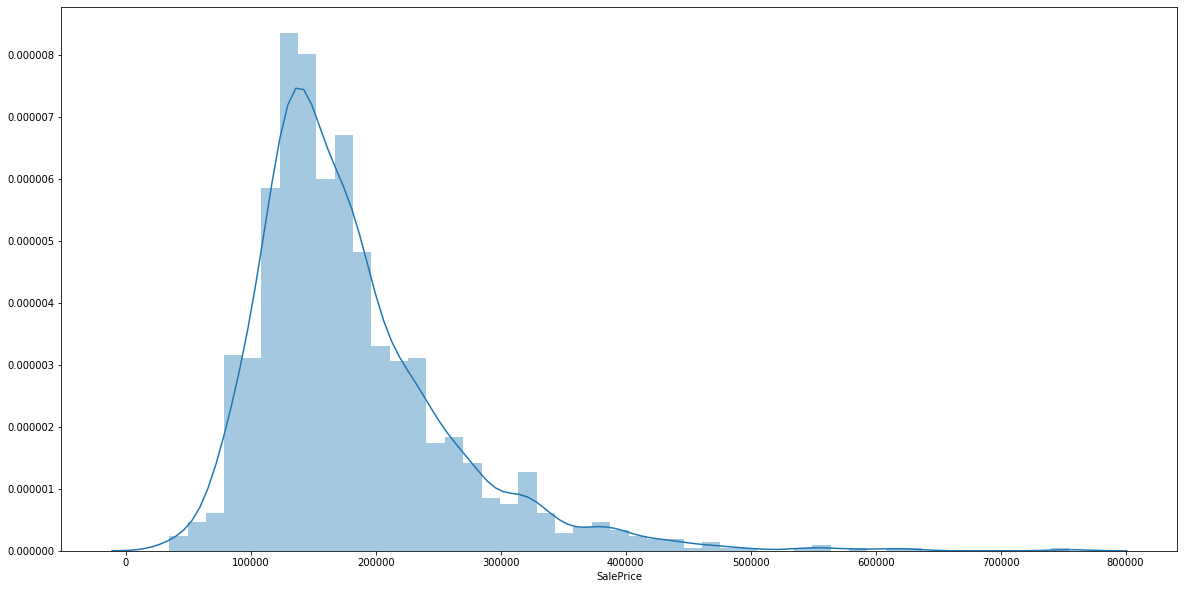

In [362]:
# target variable distribution 
plt.figure(figsize=(20,10))
sns.distplot(house_train_data.SalePrice)
plt.show()

In [363]:
df_training,df_testing = train_test_split(house_train_data,train_size=0.7,test_size=0.3,random_state=42)

In [364]:
house_train_data[['LandSlope','ExterQual','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2',
            'HeatingQC','CentralAir',  'KitchenQual','GarageFinish','GarageQual','GarageCond',
             'ExterCond','LotShape']].head()

,LandSlope,ExterQual,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,HeatingQC,CentralAir,KitchenQual,GarageFinish,GarageQual,GarageCond,ExterCond,LotShape
0,0,3,4,3,1,6,1,4,1,3,2,3,3,2,3
1,0,2,4,3,4,5,1,4,1,2,2,3,3,2,3
2,0,3,4,3,2,6,1,4,1,3,2,3,3,2,0
3,0,2,3,4,1,5,1,3,1,3,1,3,3,2,0
4,0,3,4,3,3,6,1,4,1,3,2,3,3,2,0


In [365]:
# scaling dataset
num_col = ['MSSubClass','LotArea','OverallQual','OverallCond',
           'MasVnrArea','BsmtFinSF1',
           'BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF',
           'LowQualFinSF','GrLivArea','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr',
           'KitchenAbvGr','TotRmsAbvGrd','Fireplaces','GarageCars',
           'GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch',
           'ScreenPorch','PoolArea','MiscVal','SalePrice']

scaler = StandardScaler()
df_training[num_col] = scaler.fit_transform(df_training[num_col])
df_testing[num_col] = scaler.transform(df_testing[num_col])

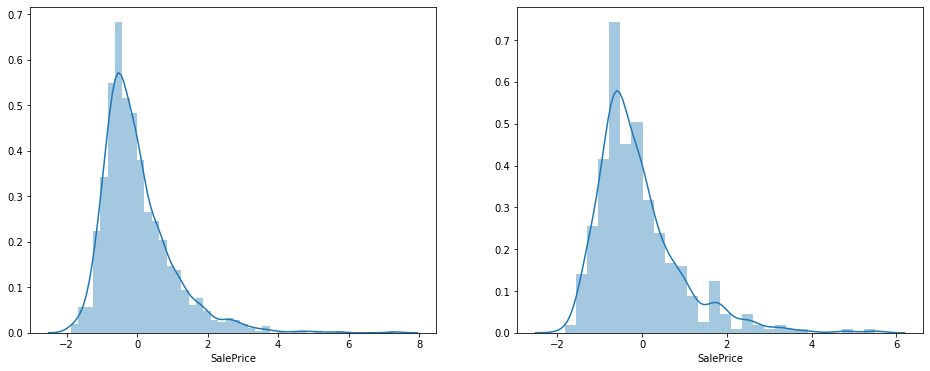

In [366]:
# checking distribution after scaling 
plt.figure(figsize=(16,6))
plt.subplot(121)
sns.distplot(df_training.SalePrice)
plt.subplot(122)
sns.distplot(df_testing.SalePrice)

In [367]:
y_training = df_training.pop('SalePrice')
X_training = df_training

In [368]:
y_testing = df_testing.pop('SalePrice')
X_testing = df_testing

In [369]:
# try to find out optimal features 
len(X_training.columns)

192

In [370]:
lm  = LinearRegression()
lm.fit(X_training,y_training)
rfe = RFE(lm,70)
rfe.fit(X_training,y_training)

RFE(estimator=LinearRegression(), n_features_to_select=70)

In [371]:
rfe_scores = pd.DataFrame(list(zip(X_training.columns,rfe.support_,rfe.ranking_)))
rfe_scores.columns = ['Column_Names','Status','Rank']

In [372]:
rfe_sel_columns = list(rfe_scores[rfe_scores.Status==True].Column_Names)

In [373]:
X_training = X_training[rfe_sel_columns]
X_testing = X_testing[rfe_sel_columns]

In [375]:
# applying lasso
lmodel = Lasso(alpha=0.001)
lmodel.fit(X_training,y_training)

y_train_pred = lmodel.predict(X_training)
print(r2_score(y_true=y_training,y_pred=y_train_pred))

y_test_pred  = lmodel.predict(X_testing)
print(r2_score(y_true=y_testing,y_pred=y_test_pred))

0.8921087634369744
0.8516900564477956


In [377]:
model_param = list(lmodel.coef_)
model_param.insert(0,lmodel.intercept_)
model_param = [round(x,3) for x in model_param]
col = df_training.columns
col.insert(0,'Constant')
list(zip(col,model_param))

[('MSSubClass', -1.138),
 ('LotArea', 0.226),
 ('LotShape', 0.129),
 ('LandSlope', 0.171),
 ('OverallQual', 0.16),
 ('OverallCond', 0.042),
 ('MasVnrArea', -0.0),
 ('ExterQual', 0.071),
 ('ExterCond', 0.012),
 ('BsmtQual', 0.0),
 ('BsmtCond', -0.022),
 ('BsmtExposure', 0.332),
 ('BsmtFinType1', 0.154),
 ('BsmtFinSF1', 0.043),
 ('BsmtFinType2', 0.136),
 ('BsmtFinSF2', -0.0),
 ('BsmtUnfSF', 0.2),
 ('TotalBsmtSF', -0.026),
 ('HeatingQC', -0.004),
 ('CentralAir', -0.088),
 ('1stFlrSF', -0.226),
 ('2ndFlrSF', -0.056),
 ('LowQualFinSF', -0.108),
 ('GrLivArea', -0.166),
 ('BsmtFullBath', -0.232),
 ('BsmtHalfBath', -0.191),
 ('FullBath', 0.355),
 ('HalfBath', -0.192),
 ('BedroomAbvGr', -0.186),
 ('KitchenAbvGr', -0.127),
 ('KitchenQual', -0.152),
 ('TotRmsAbvGrd', 0.0),
 ('Fireplaces', 0.137),
 ('GarageFinish', -0.0),
 ('GarageCars', -0.0),
 ('GarageArea', -0.108),
 ('GarageQual', -2.271),
 ('GarageCond', -0.326),
 ('WoodDeckSF', -0.238),
 ('OpenPorchSF', -0.162),
 ('EnclosedPorch', 0.0),
 ('3

In [378]:
# improve model 
folding = KFold(n_splits=10,shuffle=True,random_state=42)

hyper_parameter = {'alpha':[0.001, 0.01, 0.1,1.0, 5.0, 10.0,20.0]}

model = Lasso()

modelling_cv = GridSearchCV(estimator = model,
                        param_grid=hyper_parameter,
                        scoring='r2',
                        cv=folding,
                        verbose=1,
                        return_train_score=True
                       )

modelling_cv.fit(X_training,y_training)

Fitting 10 folds for each of 7 candidates, totalling 70 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  70 out of  70 | elapsed:    0.8s finished


GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
             estimator=Lasso(),
             param_grid={'alpha': [0.001, 0.01, 0.1, 1.0, 5.0, 10.0, 20.0]},
             return_train_score=True, scoring='r2', verbose=1)

In [379]:
cv_result_l = pd.DataFrame(modelling_cv.cv_results_)
cv_result_l['param_alpha'] = cv_result_l['param_alpha'].astype('float32')
cv_result_l.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.025850,0.005620,0.003461,0.004419,0.001,{'alpha': 0.001},0.842618,0.898178,0.810693,0.872245,...,0.899345,0.893274,0.890739,0.891452,0.889906,0.905338,0.892630,0.889254,0.893761,0.004789
1,0.006245,0.007648,0.003128,0.006256,0.010,{'alpha': 0.01},0.812587,0.855537,0.831342,0.823850,...,0.839823,0.838570,0.836504,0.836554,0.834835,0.871816,0.838913,0.833249,0.840972,0.010522
2,0.001559,0.004676,0.003124,0.006248,0.100,{'alpha': 0.1},0.741693,0.805251,0.769777,0.741077,...,0.780282,0.789278,0.783349,0.783012,0.776474,0.817421,0.783703,0.778584,0.786223,0.011038
3,0.003939,0.004997,0.004920,0.005618,1.000,{'alpha': 1.0},-0.006496,-0.021566,-0.018063,-0.001154,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.003523,0.006163,0.004890,0.007051,5.000,{'alpha': 5.0},-0.006496,-0.021566,-0.018063,-0.001154,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


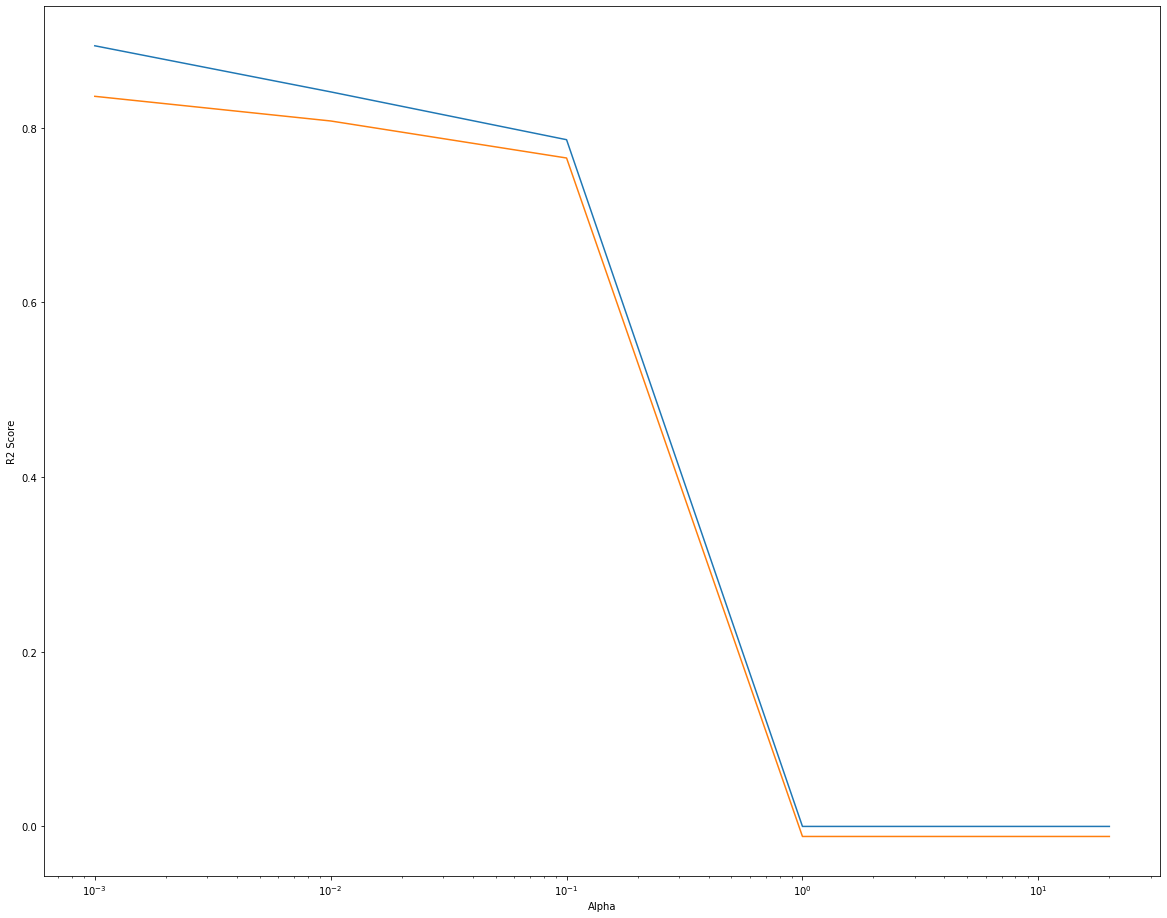

In [381]:
plt.figure(figsize=(20,16))
plt.plot(cv_result_l['param_alpha'],cv_result_l['mean_train_score'])
plt.plot(cv_result_l['param_alpha'],cv_result_l['mean_test_score'])
plt.xscale('log')
plt.ylabel('R2 Score')
plt.xlabel('Alpha')
plt.show()

In [382]:
# Checking best fit parameter 
modelling_cv.best_params_

{'alpha': 0.001}

In [384]:
lasso = Lasso(alpha=0.001)
lasso.fit(X_training,y_training)

y_training_pred = lasso.predict(X_training)
y_testing_pred = lasso.predict(X_testing)

print(r2_score(y_true=y_training,y_pred=y_training_pred))
print(r2_score(y_true=y_testing,y_pred=y_testing_pred))

0.8921087634369744
0.8516900564477956


In [386]:
modelling_param = list(lasso.coef_)
modelling_param.insert(0,lasso.intercept_)
cols = df_training.columns
cols.insert(0,'const')
lasso_coef = pd.DataFrame(list(zip(cols,modelling_param)))
lasso_coef.columns = ['Featuere','Coef']

In [387]:
lasso_coef.sort_values(by='Coef',ascending=False).head(20)

,Featuere,Coef
43,PoolArea,1.468431
67,Neighborhood_Gilbert,0.355476
26,FullBath,0.354545
11,BsmtExposure,0.331602
1,LotArea,0.226328
16,BsmtUnfSF,0.200309
44,MiscVal,0.183157
3,LandSlope,0.170964
4,OverallQual,0.160054
12,BsmtFinType1,0.153527


In [389]:
# just check ridge as well
ridge = Ridge(alpha=0.001)
ridge.fit(X_training,y_training)

y_training_pred = ridge.predict(X_training)
print(r2_score(y_training,y_training_pred))
y_testing_pred = ridge.predict(X_testing)
print(r2_score(y_testing,y_testing_pred))

0.9002833205867034
0.8387652542337657


In [ ]:
# its not good to apply ridge as per my view after seeing the above parameter , will go with lasso as lasso penalize more on dataset 
# help in feature elimination as well 

In [391]:
lasso = Lasso(alpha=0.001)
lasso.fit(X_training,y_training)

y_training_pred = lasso.predict(X_training)
y_testing_pred = lasso.predict(X_testing)

print(r2_score(y_true=y_training,y_pred=y_training_pred))
print(r2_score(y_true=y_testing,y_pred=y_testing_pred))

0.8921087634369744
0.8516900564477956


In [ ]:
# below feature are well explained 
#MiscVal      : $Value of miscellaneous feature 
#BsmtHalfBath : Basement half bathrooms
#LowQualFinSF : Low quality finished square feet (all floors)
#BsmtFullBath : Basement full bathrooms
#HalfBath     : Half baths above grade